In [316]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


## 1. BUSINESS UNDERSTANDING

## 2. DATA UNDERSTANDING

### 1. Loading Data

In [317]:
# Load the datasets
train_features = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\train_features.csv")
test_features = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\test_features.csv")
train_labels = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\train_labels.csv")

# Explore the data
print(train_features.head())
print(test_features.head())
print(train_labels.head())

print(train_features.info())
print(test_features.info())
print(train_labels.info())



    uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   
4  ablr       NaN          NaN         NaN       NaN           NaN   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3         1. 1 or 2           0.0      4. Fair           0.0  ...   
4               NaN           NaN          NaN           NaN  ...   

            rrelgimp_12            rrfcntx_m_12              rsocact_m_12  \
0  2.somewhat important                 9.Never                   9.Never   
1      1.v

#### 2. Data Exploration

#### a) Descriptive Statistics

Summary Statistics

In [318]:
print(train_features.describe())
print(test_features.describe())
print(train_labels.describe())

          n_mar_03  migration_03  adl_dress_03  adl_walk_03  adl_bath_03  \
count  2222.000000   2241.000000   2105.000000  2235.000000  2235.000000   
mean      1.134113      0.099063      0.041805     0.017002     0.007159   
std       0.482953      0.298813      0.200191     0.129308     0.084325   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       1.000000      0.000000      0.000000     0.000000     0.000000   
50%       1.000000      0.000000      0.000000     0.000000     0.000000   
75%       1.000000      0.000000      0.000000     0.000000     0.000000   
max       5.000000      1.000000      1.000000     1.000000     1.000000   

        adl_eat_03   adl_bed_03  adl_toilet_03     n_adl_03  iadl_money_03  \
count  2234.000000  2235.000000    2235.000000  2234.000000    2105.000000   
mean      0.004476     0.026398       0.013423     0.068487       0.005226   
std       0.066770     0.160352       0.115102     0.392793       0.072117   
min

- Get a count of each education level.

In [319]:
education_counts = train_features['edu_gru_03'].value_counts()
print(education_counts)


1. 1–5 years       842
0. No education    452
2. 6 years         422
3. 7–9 years       302
4. 10+ years       214
Name: edu_gru_03, dtype: int64


- Visualize Distributions

Plot the distribution of marital status.

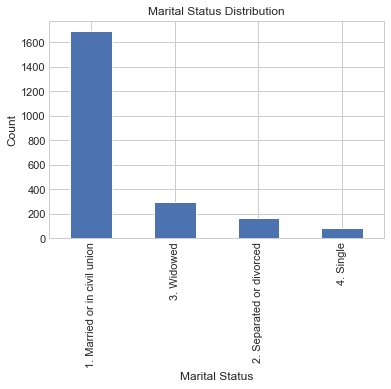

In [320]:

train_features['married_03'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


Majority of the population are either maried or in a civil union

-  Identify Relationships

In [321]:
correlation = train_features.corr()
print(correlation)


                 n_mar_03  migration_03  adl_dress_03  adl_walk_03  \
n_mar_03         1.000000      0.035342     -0.048134    -0.000685   
migration_03     0.035342      1.000000     -0.036109     0.014614   
adl_dress_03    -0.048134     -0.036109      1.000000     0.255194   
adl_walk_03     -0.000685      0.014614      0.255194     1.000000   
adl_bath_03      0.020462     -0.010256      0.274902     0.522506   
...                   ...           ...           ...          ...   
hinc_cap_12     -0.005369     -0.009552     -0.004493    -0.004039   
rinc_pension_12  0.006166     -0.004492     -0.007145    -0.009158   
sinc_pension_12 -0.033584     -0.044000     -0.015087    -0.011985   
a16a_12         -0.206789      0.206219      0.227995          NaN   
a21_12           0.093941     -0.044623     -0.098678     0.352360   

                 adl_bath_03  adl_eat_03  adl_bed_03  adl_toilet_03  n_adl_03  \
n_mar_03            0.020462    0.023115   -0.034299       0.017355 -0.000926 

- Interpretation of Key Correlations

1. adl_walk_03 and adl_bath_03:

Correlation: 0.522506
Interpretation: There is a moderate positive correlation between the ability to walk and the ability to bathe. This suggests that individuals who have better mobility (walking) also tend to have better self-care capabilities (bathing).

2. adl_dress_03 and adl_walk_03

Correlation: 0.255194
Interpretation: There is a weak to moderate positive correlation. Those who can dress themselves also have some ability to walk, implying that physical mobility may impact the ability to dress.

3.n_mar_03 (number of marital statuses) and adl_walk_03

Correlation: -0.000685
Interpretation: There is virtually no correlation between marital status and the ability to walk, indicating that these factors are likely independent of each other in this dataset.
migration_03 and adl_dress_03

4.migration_03 and adl_dress_03

Correlation: -0.036109
Interpretation: There is a slight negative correlation. This could suggest that higher levels of migration may be associated with slightly lower levels of dressing ability, though the relationship is weak.
n_adl_03 (number of activities of daily living)

5. n_adl_03 (number of activities of daily living)

Correlation with adl_walk_03: 0.743969
Interpretation: A strong positive correlation with walking ability suggests that the more activities of daily living an individual can perform, the better their ability to walk. This implies a strong link between overall functionality and mobility.





Strongest Relationships: Focus on adl_walk_03 as it has strong positive correlations with other activities of daily living (like 

adl_bath_03 and adl_dress_03). This indicates that mobility is a critical factor in overall functional health.


Weak Relationships: Variables like n_mar_03 and migration_03 show weak correlations with others, indicating that marital status and
 
migration may not have a significant impact on physical capabilities as measured here.

#### b) Checking and Handling Missing Values


In [322]:
# Find missing values
print(train_features.isnull().sum())
print(test_features.isnull().sum())


uid              0
age_03        1036
urban_03      1034
married_03    1034
n_mar_03      1054
              ... 
a21_12        3234
a22_12        3240
a33b_12       3234
a34_12        1164
j11_12          75
Length: 184, dtype: int64
uid             0
age_03        249
urban_03      249
married_03    249
n_mar_03      251
             ... 
a21_12        808
a22_12        809
a33b_12       808
a34_12        277
j11_12         24
Length: 184, dtype: int64


There are so many missing values in this dataset. I will proceed with handling the missing values

In [323]:
# Drop columns with more than 40% missing values in both datasets
threshold = 0.4
train_features_cleaned = train_features.loc[:, train_features.isnull().mean() < threshold]
test_features_cleaned = test_features.loc[:, test_features.isnull().mean() < threshold]



In [324]:
# Impute missing values for numerical features
for col in train_features_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    train_features_cleaned[col].fillna(train_features_cleaned[col].mean(), inplace=True)

for col in test_features_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    test_features_cleaned[col].fillna(test_features_cleaned[col].mean(), inplace=True)

# Impute missing values for categorical features
for col in train_features_cleaned.select_dtypes(include=['object']).columns:
    train_features_cleaned[col].fillna(train_features_cleaned[col].mode()[0], inplace=True)

for col in test_features_cleaned.select_dtypes(include=['object']).columns:
    test_features_cleaned[col].fillna(test_features_cleaned[col].mode()[0], inplace=True)


c:\Users\David\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [325]:
print(train_features.dtypes)


uid            object
age_03         object
urban_03       object
married_03     object
n_mar_03      float64
               ...   
a21_12        float64
a22_12         object
a33b_12        object
a34_12         object
j11_12         object
Length: 184, dtype: object


Identify Columns for Conversion

In [326]:
# List of object columns
object_columns = train_features.select_dtypes(include=['object']).columns
print("Object Columns:\n", object_columns)


Object Columns:
 Index(['uid', 'age_03', 'urban_03', 'married_03', 'edu_gru_03',
       'n_living_child_03', 'glob_hlth_03', 'bmi_03', 'decis_famil_03',
       'employment_03', 'age_12', 'urban_12', 'married_12', 'edu_gru_12',
       'n_living_child_12', 'glob_hlth_12', 'bmi_12', 'decis_famil_12',
       'decis_personal_12', 'employment_12', 'satis_ideal_12',
       'satis_excel_12', 'satis_fine_12', 'cosas_imp_12', 'wouldnt_change_12',
       'memory_12', 'ragender', 'rameduc_m', 'rafeduc_m', 'sgender_03',
       'rjlocc_m_03', 'rjobend_reason_03', 'rrelgimp_03', 'sgender_12',
       'rjlocc_m_12', 'rjobend_reason_12', 'rrelgimp_12', 'rrfcntx_m_12',
       'rsocact_m_12', 'rrelgwk_12', 'a22_12', 'a33b_12', 'a34_12', 'j11_12'],
      dtype='object')


Identify Categorical Columns

In [327]:
# Check unique values in some categorical columns
for col in ['age_03', 'urban_03', 'married_03']:
    print(f"{col} unique values:\n", train_features[col].unique())


age_03 unique values:
 [nan '1. 50–59' '3. 70–79' '2. 60–69' '0. 49 or younger' '4. 80+']
urban_03 unique values:
 [nan '1. 100,000+' '0. <100,000']
married_03 unique values:
 [nan '3. Widowed' '1. Married or in civil union' '4. Single'
 '2. Separated or divorced']


Convert Categorical Columns

I will use label encoder

In [328]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoders = {}

# Convert categorical columns to numeric
categorical_columns = ['age_03', 'urban_03', 'married_03', 'edu_gru_03', 'employment_03']  

for col in categorical_columns:
    le = LabelEncoder()
    train_features[col] = le.fit_transform(train_features[col].astype(str))  # Convert to string first 
    label_encoders[col] = le  # Save the encoder for inverse transformation later


##### Convert Relevant Numeric Columns

Use pd.to_numeric() for columns that should be numeric.

In [329]:
# Identify columns that should be numeric
numeric_columns = ['n_mar_03', 'bmi_03'] 

for col in numeric_columns:
    train_features[col] = pd.to_numeric(train_features[col], errors='coerce')


Check and fill or drop NaN values as needed

In [330]:
# Check for NaN values
print(train_features.isnull().sum())


uid              0
age_03           0
urban_03         0
married_03       0
n_mar_03      1054
              ... 
a21_12        3234
a22_12        3240
a33b_12       3234
a34_12        1164
j11_12          75
Length: 184, dtype: int64


In [331]:
# Fill NaNs for numeric columns
for col in numeric_columns:
    train_features[col].fillna(train_features[col].mean(), inplace=True)

# drop rows with NaN values for categorical columns 
train_features.dropna(subset=categorical_columns, inplace=True)

In [332]:
#check the data types again
print(train_features.dtypes)


uid            object
age_03          int32
urban_03        int32
married_03      int32
n_mar_03      float64
               ...   
a21_12        float64
a22_12         object
a33b_12        object
a34_12         object
j11_12         object
Length: 184, dtype: object


In [333]:
# Identify remaining object columns
object_columns = train_features.select_dtypes(include=['object']).columns
print("Remaining Object Columns:\n", object_columns)


Remaining Object Columns:
 Index(['uid', 'n_living_child_03', 'glob_hlth_03', 'decis_famil_03', 'age_12',
       'urban_12', 'married_12', 'edu_gru_12', 'n_living_child_12',
       'glob_hlth_12', 'bmi_12', 'decis_famil_12', 'decis_personal_12',
       'employment_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12',
       'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'ragender',
       'rameduc_m', 'rafeduc_m', 'sgender_03', 'rjlocc_m_03',
       'rjobend_reason_03', 'rrelgimp_03', 'sgender_12', 'rjlocc_m_12',
       'rjobend_reason_12', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12',
       'rrelgwk_12', 'a22_12', 'a33b_12', 'a34_12', 'j11_12'],
      dtype='object')


In [334]:

# Convert remaining categorical columns
for col in object_columns:
    le = LabelEncoder()
    train_features[col] = le.fit_transform(train_features[col].astype(str))  


In [335]:
# Check for NaN values
nan_counts = train_features.isnull().sum()
print("NaN Counts:\n", nan_counts[nan_counts > 0])


NaN Counts:
 migration_03       1035
adl_dress_03       1171
adl_walk_03        1041
adl_bath_03        1041
adl_eat_03         1042
                   ... 
hinc_cap_12          89
rinc_pension_12      89
sinc_pension_12    1185
a16a_12            3252
a21_12             3234
Length: 140, dtype: int64


In [336]:
 #drop specific columns that have too many missing values
train_features.drop(columns=['a16a_12', 'a21_12'], inplace=True) 

In [337]:
# Fill numerical columns with mean 
numerical_cols = train_features.select_dtypes(include=['float64', 'int64', 'int32']).columns
for col in numerical_cols:
    train_features[col].fillna(train_features[col].mean(), inplace=True)  

# Fill categorical columns with mode
categorical_cols = train_features.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_features[col].fillna(train_features[col].mode()[0], inplace=True)  


In [338]:
#check the data again to ensure there are no remaining missing values
print(train_features.isnull().sum().sum())  


3276


In [339]:
# Count of missing values in each column
missing_counts = train_features.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]

print("Columns with Missing Values:\n", missing_columns)


Columns with Missing Values:
 bmi_03    3276
dtype: int64


In [340]:
# Drop the bmi_03 column
train_features.drop(columns=['bmi_03'], inplace=True)

# Check to ensure it has been dropped
print("Columns after dropping bmi_03:", train_features.columns)


Columns after dropping bmi_03: Index(['uid', 'age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03',
       'n_living_child_03', 'migration_03', 'glob_hlth_03', 'adl_dress_03',
       ...
       'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
       'rsocact_m_12', 'rrelgwk_12', 'a22_12', 'a33b_12', 'a34_12', 'j11_12'],
      dtype='object', length=181)


In [341]:
# Check for NaN values
print(train_features.isnull().sum().sum())  # Should be 0 if all missing values are handled


0


All missing values have been handled

### 3. Define Labels

In [342]:
# Load the training labels
train_labels = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\train_labels.csv")  
train_labels.head()


,uid,year,composite_score
0,aace,2021,175
1,aanz,2021,206
2,aape,2016,161
3,aape,2021,144
4,aard,2021,104


##### b) Align Features and Labels

In [343]:
y_train = train_labels['composite_score']  
print(y_train.shape)  



(4343,)


In [344]:
print(train_features['uid'].dtype)  # Check the data type in train_features
print(train_labels['uid'].dtype)    # Check the data type in train_labels


int32
object


The output indicates that the uid column in train_features is of type int32, while in train_labels, it's of type object. To resolve this, I will convert the uid column in train_features to object (string) format

In [345]:
#Convert uid in train_features to String
train_features['uid'] = train_features['uid'].astype(str)


In [346]:
#verify the change
print(train_features['uid'].dtype) 
print(train_labels['uid'].dtype)    


object
object


In [347]:
# Merge train_features with train_labels on 'uid'
data = train_labels.merge(train_features, on='uid', how='left')
data.head()



,uid,year,composite_score,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,...,rinc_pension_12,sinc_pension_12,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a22_12,a33b_12,a34_12,j11_12
0,aace,2021,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aanz,2021,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aape,2016,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aape,2021,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aard,2021,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
#get the percentage of missing values for each column
missing_per_column = df.isnull().sum()
print(missing_per_column[missing_per_column > 0])  # Display only columns with missing values


Series([], dtype: int64)


##### c) Check for Duplicates

Inspect both datasets for duplicate rows that may cause discrepancies.

In [349]:
print("Duplicate rows in features:", train_features.duplicated().sum())
print("Duplicate rows in labels:", train_labels.duplicated().sum())


Duplicate rows in features: 0
Duplicate rows in labels: 0


There are no duplicate rows in both the features and labels

#### Understanding the target variable

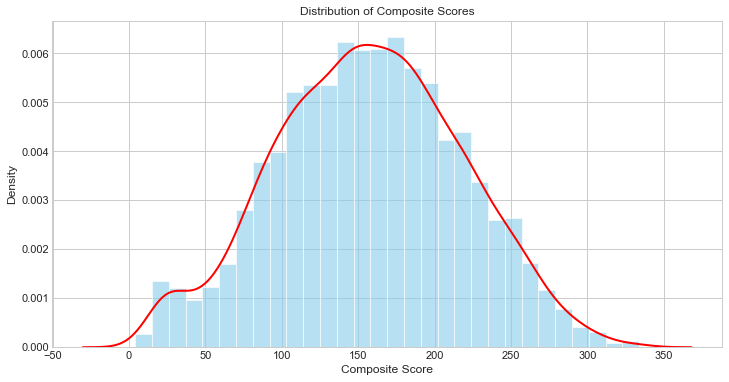

In [350]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set plot style
plt.style.use('seaborn-whitegrid')

# Create a figure
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(data['composite_score'], bins=30, color='skyblue', alpha=0.6, density=True)

# Plot KDE
sns.kdeplot(data['composite_score'], color='red', linewidth=2)

# Set titles and labels
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Density')

# Show the plot
plt.show()


In [351]:
print(type(data))



<class 'pandas.core.frame.DataFrame'>


Convert NumPy Array to DataFrame

In [352]:
import pandas as pd

# Assuming 'data' is your NumPy array
data = pd.DataFrame(data, columns=['uid', 'year', 'composite_score'])  


In [353]:

columns = ['uid', 'year', 'composite_score']

# Create DataFrame correctly
df = pd.DataFrame(data, columns=columns)
print(df.shape)  


(4343, 3)


In [354]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample DataFrame
data = pd.DataFrame({
    'category': ['low', 'medium', 'high', 'medium', 'low'],
    'value': [10, 20, 30, 20, 10]
})

# Initialize the Ordinal Encoder
encoder = OrdinalEncoder()

# Fit and transform the categorical column
data['category_encoded'] = encoder.fit_transform(data[['category']])

# Display the DataFrame
print(data)


  category  value  category_encoded
0      low     10               1.0
1   medium     20               2.0
2     high     30               0.0
3   medium     20               2.0
4      low     10               1.0


In [355]:
#Analyze Correlations
df.corr()


,year,composite_score
year,1.000000,-0.042732
composite_score,-0.042732,1.000000


The correlation matrix shows a weak negative correlation of -0.043 between year and composite_score. This suggests that there is no linear relationship between these two variables

Explore Nonlinear Relationships

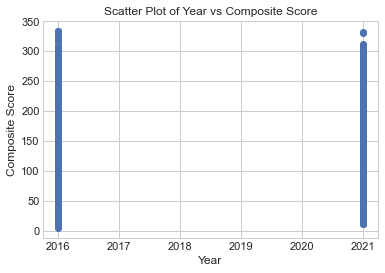

In [356]:
import matplotlib.pyplot as plt

plt.scatter(df['year'], df['composite_score'])
plt.xlabel('Year')
plt.ylabel('Composite Score')
plt.title('Scatter Plot of Year vs Composite Score')
plt.show()


The composite_score values are concentrated at the two ends (for years 2016 and 2021), with a gap in the middle years (2017–2020).

 Compute the correlation matrix for the entire dataset to see the relationships between composite_score and all other variables.

In [357]:
# Calculate correlations with composite_score
correlations = df.corr()['composite_score'].sort_values(ascending=False)
print(correlations.head(15))  # Display top 15 features most correlated with composite_score


composite_score    1.000000
year              -0.042732
Name: composite_score, dtype: float64


The composite score has only one feature ie year.

#### Feature Engineering

1. Combine Features

- Marriage and Children: Combine marital status (married_03) and number of children (n_living_child_03) to create a "family support" indicator, which could reflect social support structures.

- Age Groups: Group age_03 into categories (e.g., 18-35, 36-50, 51-65, 65+), which could reveal age-related patterns more effectively than raw age values.

In [358]:
#Creating a 'family_support' feature
data['family_support'] = data['married_03'] * df['n_living_child_03']


KeyError: 'married_03'

##### 2. Extract Time-Based Features

- Time Since a Specific Year: Calculate the number of years since a baseline year (e.g., time since 2001).

- Cohort Effects: If Alzheimer's rates or social determinants have changed over time, creating a binary variable for before and after certain years might help.

In [ ]:
 #Calculating years since 2001
df['years_since_2000'] = df['year'] - 2001


##### 3. Transformations of Continuous Features

- Log Transform: apply log transorm to rinc_pension_12) to normalize 

- Binning or Bucketing: Divide features like age into bins (e.g., young, middle-aged, senior) to simplify their relationships with the target.

In [ ]:

# Log transform for skewed income feature
df['log_income'] = np.log1p(df['rinc_pension_12'])  # Adding 1 to avoid log(0)


KeyError: 'rinc_pension_12'

##### 4. Interaction Terms: Create features that capture interactions between variables.

- Urban and Income: A high-income person in an urban area (urban_03 and rinc_pension_12) might have different risks than one in a rural area.

- Education and Migration: Education level combined with migration status (edu_gru_03 and migration_03) might indicate access to resources that affect cognitive health.

In [ ]:
#Interaction between urban status and income
df['urban_income'] = df['urban_03'] * df['rinc_pension_12']


KeyError: 'urban_03'

##### 5. Aggregate or Count Features

- Social Engagement: Sum or average indicators of social activities to create a single “social engagement” score.

In [ ]:
#Aggregating social activity features
df['social_engagement'] = df[['rsocact_m_12', 'rrelgwk_12']].sum(axis=1)


KeyError: "None of [Index(['rsocact_m_12', 'rrelgwk_12'], dtype='object')] are in the [columns]"

##### 6. Binary Encoding

- High Education Level: Encode as 1 if edu_gru_03 is above a certain level and 0 otherwise, indicating high education as a protective factor.

In [ ]:
#Binary flag for high education level
df['high_education'] = (df['edu_gru_03'] > 12).astype(int)  # Assuming 12 years as the threshold


KeyError: 'edu_gru_03'

#### Incorporating Feature Engineering in the Pipeline